In [1]:
import pandas as pd
import h5py
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
particle_path = 'data/full_pileup_pilot/ttbar/v2/truth/particles/events0-99.h5'

with h5py.File(particle_path, "r") as f:

    # list the dic keys 
    print("Keys of file:",[i for i in f.keys()])

    # list the keys of 'events'
    events = f['events']
    print("Events:", [i for i in events.keys()])

    # list the keys of each event
    event_0 = events["event_0"]
    print([i for i in event_0.keys()])
    
    # look at each particle
    particles = event_0["particles"]

    print("Shape:", particles.shape)
    print("Data type:", particles.dtype)
    print("Example row:", particles[0])

Keys of file: ['events']
Events: ['event_0', 'event_1', 'event_2', 'event_3', 'event_4', 'event_5', 'event_6', 'event_7', 'event_8', 'event_9']
['particles']
Shape: (880329,)
Data type: [('particle_id', '<i8'), ('pdg_id', '<i4'), ('mass', '<f8'), ('energy', '<f8'), ('charge', '<f4'), ('vx', '<f4'), ('vy', '<f4'), ('vz', '<f4'), ('time', '<f4'), ('px', '<f4'), ('py', '<f4'), ('pz', '<f4'), ('vertex_primary', '<f8')]
Example row: (0, 2212, 0.93827, 7000.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7000.0, nan)


In [3]:
rows = []
with h5py.File(particle_path, "r") as f:
    for event_name, event_data in f["events"].items():

        # checking that the event contains data
        if "particles" not in event_data:
            print(f"Skipping {event_name} (no 'particles')")
            continue
        
        # save all the rows (accsessed by [:]) into aa a list
        arr = event_data["particles"][:]

        # making a dataframe from that list
        df = pd.DataFrame(arr)

        # adding which event it came from into a df column 
        df["event"] = event_name
        rows.append(df)

particles_df = pd.concat(rows)
print(f"Loaded {len(particles_df)} particles from {len(rows)} events.")
print(particles_df)

Skipping event_9 (no 'particles')
Loaded 8637696 particles from 9 events.
        particle_id  pdg_id      mass       energy    charge         vx  \
0                 0    2212  0.938270  7000.000000  1.000000   0.000000   
1                 1      -2  0.000000  1028.604778 -0.666667   0.009780   
2                 2       2  0.330000  2208.906631  0.666667   0.009780   
3                 3    2103  0.771330  1147.773510  0.333333   0.009780   
4                 4       2  0.330000  2614.671253  0.666667   0.009780   
...             ...     ...       ...          ...       ...        ...   
865674       865672      11  0.000511     0.080668 -1.000000 -40.588081   
865675       865673     -11  0.000511     0.169258  1.000000 -40.588081   
865676       865674      11  0.000511     0.001129 -1.000000 -49.149178   
865677       865675      22  0.000000     0.099570  0.000000 -41.244038   
865678       865676      22  0.000000     0.022104  0.000000 -38.764374   

               vy        

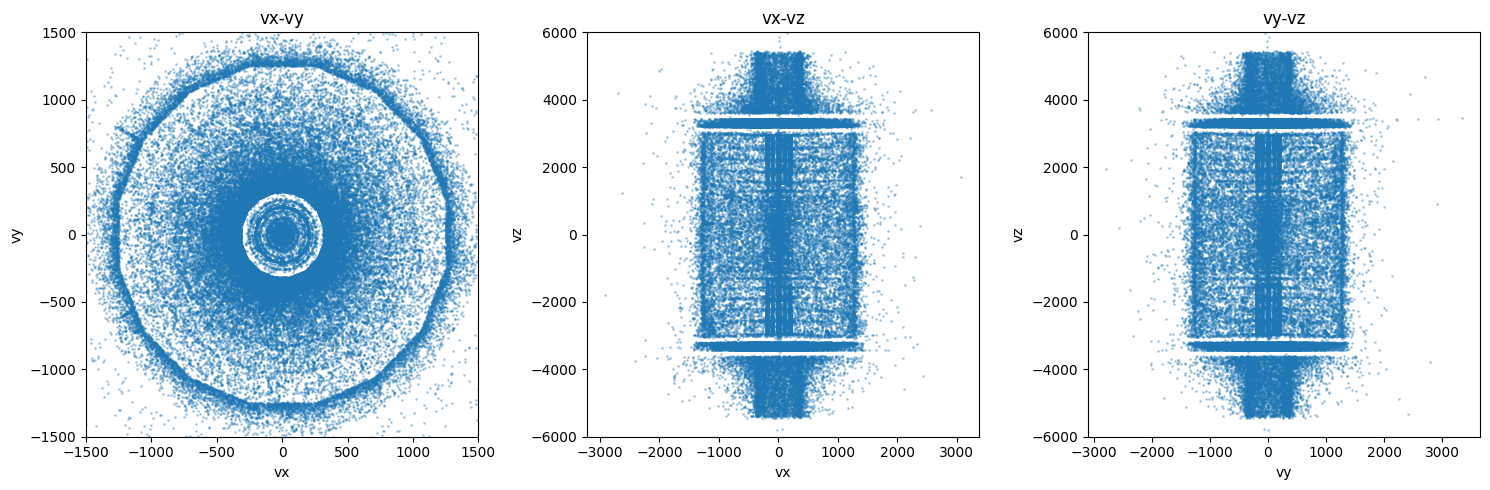

In [4]:
# taking 100k particles to make plots quicker
sample = particles_df.sample(n=100_000, random_state=42)

# --- 1️⃣ Spatial coordinates (vx, vy, vz)
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes = axes.ravel()

axes[0].scatter(sample["vx"], sample["vy"], s=1, alpha=0.3)
axes[0].set_xlabel("vx")
axes[0].set_ylabel("vy")
axes[0].set_xlim(-1500, 1500)
axes[0].set_ylim(-1500, 1500)
axes[0].set_title("vx-vy")

axes[1].scatter(sample["vx"], sample["vz"], s=1, alpha=0.3)
axes[1].set_xlabel("vx")
axes[1].set_ylabel("vz")
axes[1].set_ylim(-6000,6000)
axes[1].set_title("vx-vz")

axes[2].scatter(sample["vy"], sample["vz"], s=1, alpha=0.3)
axes[2].set_xlabel("vy")
axes[2].set_ylabel("vz")
axes[2].set_ylim(-6000,6000)
axes[2].set_title("vy-vz")

plt.tight_layout()
plt.show()

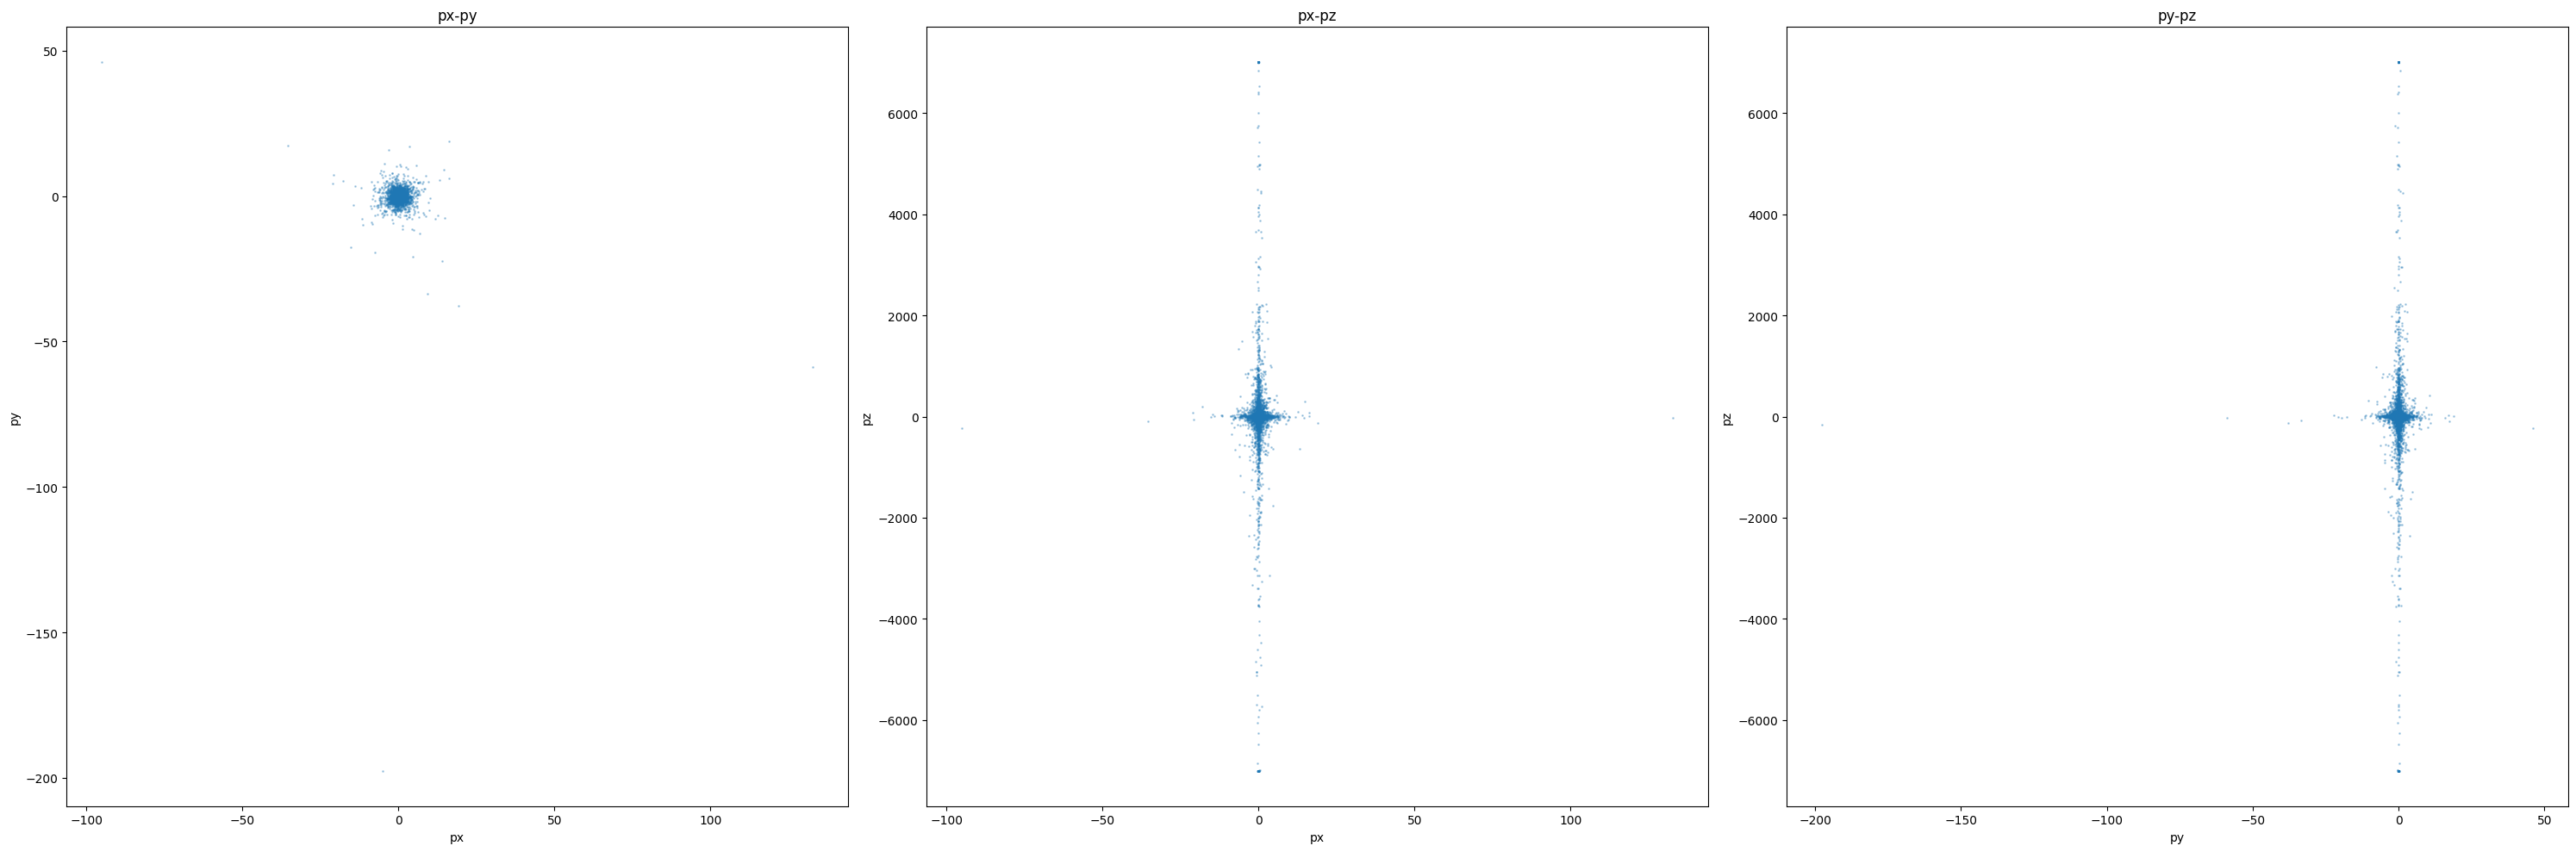

In [5]:
fig, axes = plt.subplots(1, 3, figsize=(30, 10))
axes = axes.ravel()

axes[0].scatter(sample["px"], sample["py"], s=1, alpha=0.3)
axes[0].set_xlabel("px")
axes[0].set_ylabel("py")
axes[0].set_title("px-py")

axes[1].scatter(sample["px"], sample["pz"], s=1, alpha=0.3)
axes[1].set_xlabel("px")
axes[1].set_ylabel("pz")
axes[1].set_title("px-pz")

axes[2].scatter(sample["py"], sample["pz"], s=1, alpha=0.3)
axes[2].set_xlabel("py")
axes[2].set_ylabel("pz")
axes[2].set_title("py-pz")

plt.tight_layout()
plt.show()

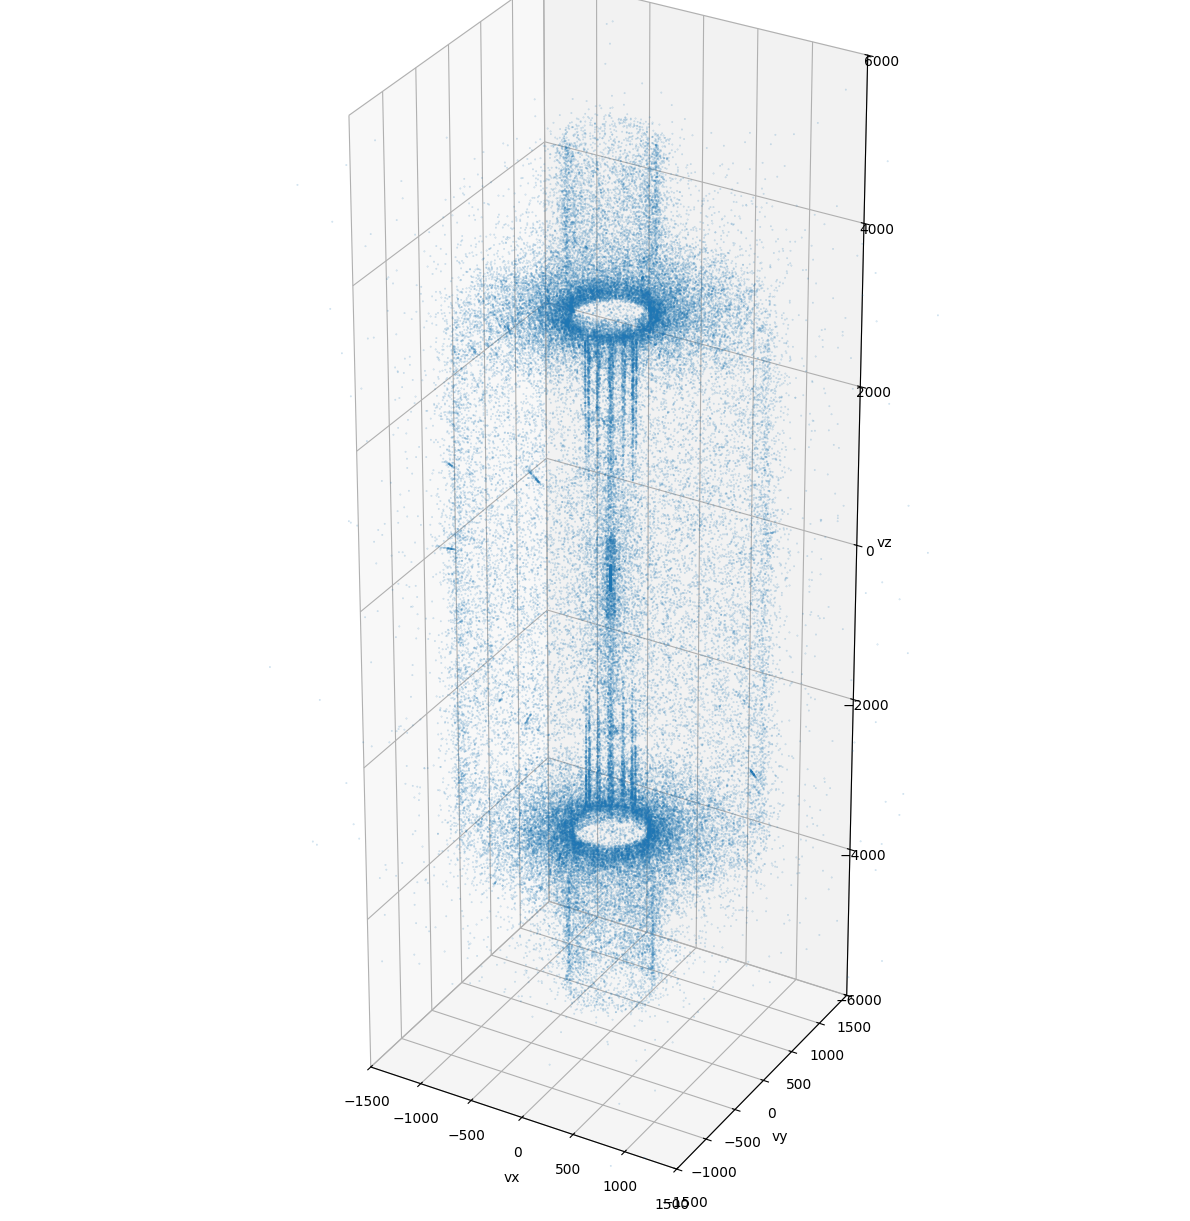

In [6]:
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111, projection="3d")

ax.scatter(
    sample["vx"], sample["vy"], sample["vz"],
    s=0.1, alpha=0.3
)

ax.set_box_aspect([1, 1, 3])
ax.set_xlabel("vx")
ax.set_ylabel("vy")
ax.set_zlabel("vz")
ax.set_xlim(-1500, 1500)
ax.set_ylim(-1500, 1500)
ax.set_zlim(-6000, 6000)
plt.tight_layout()
plt.show()

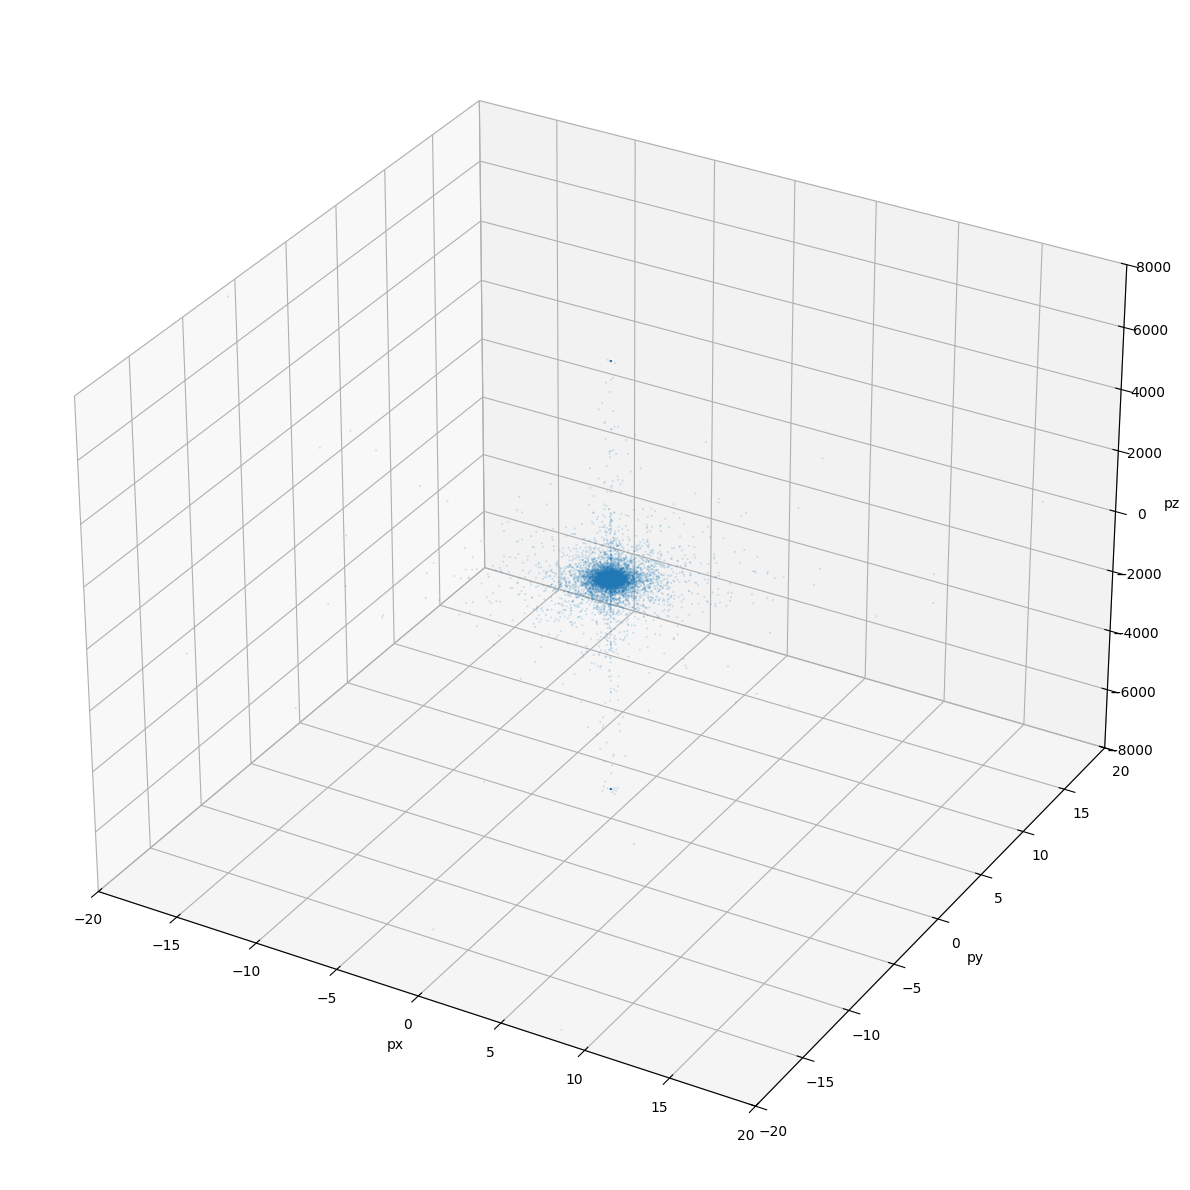

In [7]:
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111, projection="3d")

ax.scatter(
    sample["px"], sample["py"], sample["pz"],
    s=0.1, alpha=0.3
)
ax.set_xlabel("px")
ax.set_ylabel("py")
ax.set_zlabel("pz")
ax.set_xlim(-20, 20)
ax.set_ylim(-20, 20)
ax.set_zlim(-8000, 8000)
plt.tight_layout()
plt.show()

In [8]:
tracker_path = 'data/full_pileup_pilot/ttbar/v2/reco/tracker_hits/events0-99.h5'

with h5py.File(tracker_path, "r") as f:

    # list the dic keys 
    print("Keys of file:",[i for i in f.keys()])

    # list the keys of 'events'
    events = f['events']
    print("Events:", [i for i in events.keys()])

    # list the keys of each event
    event_0 = events["event_0"]
    print([i for i in event_0.keys()])
    
    # look at each measurment
    measurements = event_0["measurements"]

    print("Shape:", measurements.shape)
    print("Data type:", measurements.dtype)
    print("Example row:", measurements[0])

Keys of file: ['events']
Events: ['event_0', 'event_1', 'event_10', 'event_11', 'event_12', 'event_13', 'event_14', 'event_15', 'event_16', 'event_17', 'event_18', 'event_19', 'event_2', 'event_20', 'event_21', 'event_22', 'event_23', 'event_24', 'event_25', 'event_26', 'event_27', 'event_28', 'event_29', 'event_3', 'event_30', 'event_31', 'event_32', 'event_33', 'event_34', 'event_35', 'event_36', 'event_37', 'event_38', 'event_39', 'event_4', 'event_40', 'event_41', 'event_42', 'event_43', 'event_44', 'event_45', 'event_46', 'event_47', 'event_48', 'event_49', 'event_5', 'event_50', 'event_51', 'event_52', 'event_53', 'event_54', 'event_55', 'event_56', 'event_57', 'event_58', 'event_59', 'event_6', 'event_60', 'event_61', 'event_62', 'event_63', 'event_64', 'event_65', 'event_66', 'event_67', 'event_68', 'event_69', 'event_7', 'event_70', 'event_71', 'event_72', 'event_73', 'event_74', 'event_75', 'event_76', 'event_77', 'event_78', 'event_79', 'event_8', 'event_80', 'event_81', 'ev

In [9]:
rows = []
with h5py.File(tracker_path, "r") as f:
    for event_name, event_data in f["events"].items():

        # checking that the event contains data
        if "measurements" not in event_data:
            print(f"Skipping {event_name} (no 'measurements')")
            continue
        
        # save all the rows (accsessed by [:]) into aa a list
        arr = event_data["measurements"][:]

        # making a dataframe from that list
        df = pd.DataFrame(arr)

        # adding which event it came from into a df column 
        df["event"] = event_name
        rows.append(df)

tracker_df = pd.concat(rows)
print(f"Loaded {len(tracker_df)} measurements from {len(rows)} events.")
print(tracker_df)

Loaded 24914140 measurements from 100 events.
                 x           y            z  volume_id  layer_id  surface_id  \
0        85.607491    3.613425 -1515.599976         16         4           1   
1        92.881134   -3.039804 -1515.599976         16         4           1   
2        66.319473   -7.858758 -1515.599976         16         4           1   
3        65.872543   -3.477791 -1515.599976         16         4           1   
4        92.184578   -4.563632 -1515.599976         16         4           1   
...            ...         ...          ...        ...       ...         ...   
233379  417.815704  899.408813  3009.500000         30        12         192   
233380  413.691681  901.021179  3009.500000         30        12         192   
233381  372.737976  917.032959  3009.500000         30        12         192   
233382  372.626648  917.076477  3009.500000         30        12         192   
233383  422.884308  897.427124  3009.500000         30        12         1

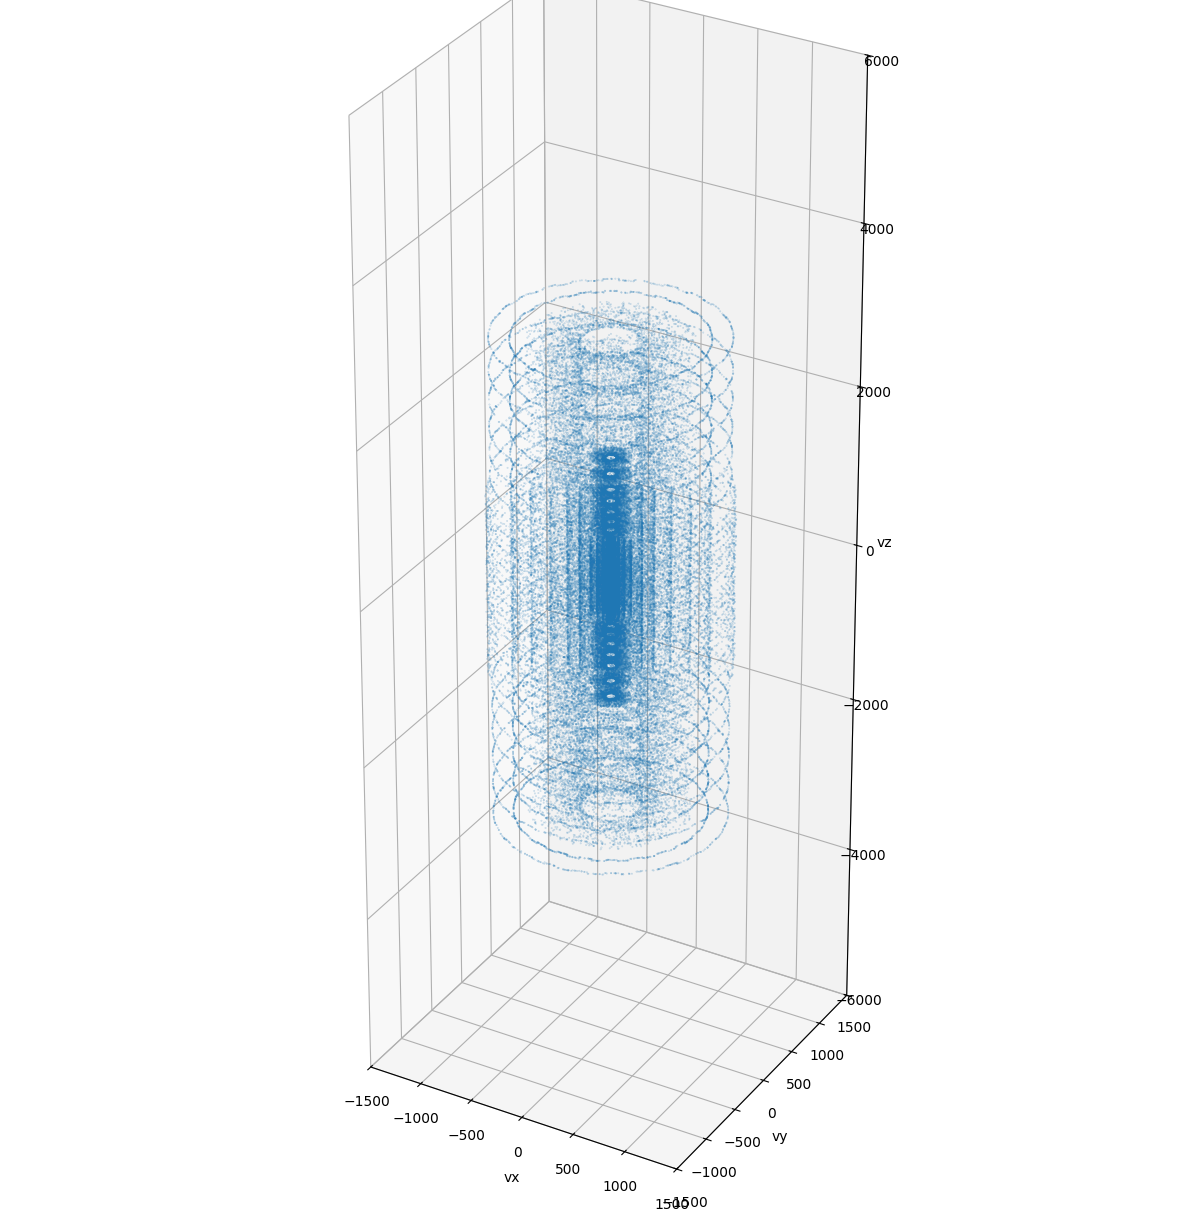

In [10]:
sample_tracker = tracker_df.sample(n=100_000, random_state=42)

fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111, projection="3d")

ax.scatter(
    sample_tracker["x"], sample_tracker["y"], sample_tracker["z"],
    s=0.1, alpha=0.3
)

ax.set_box_aspect([1, 1, 3])
ax.set_xlabel("vx")
ax.set_ylabel("vy")
ax.set_zlabel("vz")
ax.set_xlim(-1500, 1500)
ax.set_ylim(-1500, 1500)
ax.set_zlim(-6000, 6000)
plt.tight_layout()
plt.show()

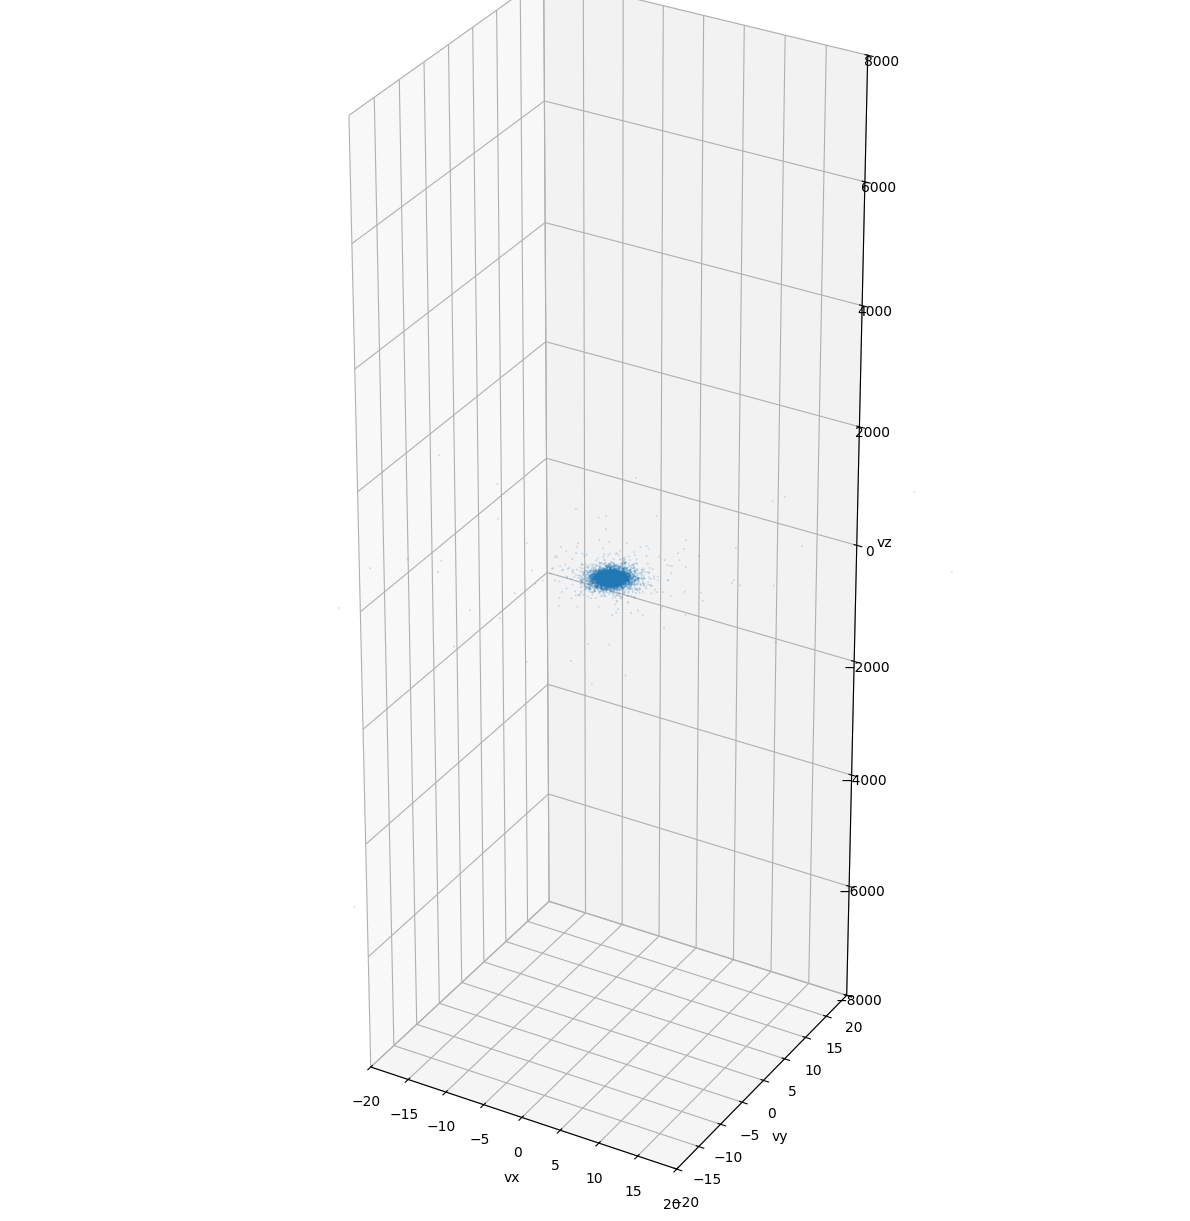

In [11]:
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111, projection="3d")

ax.scatter(
    sample_tracker["px"], sample_tracker["py"], sample_tracker["pz"],
    s=0.1, alpha=0.3
)

ax.set_box_aspect([1, 1, 3])
ax.set_xlabel("vx")
ax.set_ylabel("vy")
ax.set_zlabel("vz")
ax.set_xlim(-20, 20)
ax.set_ylim(-20, 20)
ax.set_zlim(-8000, 8000)
plt.tight_layout()
plt.show()

In [12]:
particles_df[particles_df['event'] == 'event_0']

,particle_id,pdg_id,mass,energy,charge,vx,vy,vz,time,px,py,pz,vertex_primary,event
0,0,2212,0.938270,7000.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,7000.000000,NaN,event_0
1,1,-2,0.000000,1028.604778,-0.666667,0.009780,-0.003074,-89.848335,-0.765510,-1.615587e-27,0.000000,1028.604736,NaN,event_0
2,2,2,0.330000,2208.906631,0.666667,0.009780,-0.003074,-89.848335,-0.765510,0.000000e+00,0.000000,2208.906494,NaN,event_0
3,3,2103,0.771330,1147.773510,0.333333,0.009780,-0.003074,-89.848335,-0.765510,0.000000e+00,0.000000,1147.773193,NaN,event_0
4,4,2,0.330000,2614.671253,0.666667,0.009780,-0.003074,-89.848335,-0.765510,0.000000e+00,0.000000,2614.671143,NaN,event_0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
880324,880322,-11,0.000511,0.007907,1.000000,-72.673141,1323.954956,2621.724854,9.437787,-2.477711e-03,0.002932,0.006894,1.0,event_0
880325,880323,-11,0.000511,0.029932,1.000000,-64.631561,1297.143433,2596.949951,9.349813,9.149698e-03,-0.028324,0.003121,1.0,event_0
880326,880324,11,0.000511,0.002381,-1.000000,1249.222534,-386.984009,2908.253662,8859.554688,1.222434e-03,-0.001350,-0.001447,1.0,event_0
880327,880325,2112,0.939565,0.940569,0.000000,1289.538086,400.301910,2893.576172,25.586529,2.374915e-02,0.035455,0.008157,1.0,event_0


In [13]:
tracker_df[tracker_df['event'] == 'event_0']

,x,y,z,volume_id,layer_id,surface_id,true_x,true_y,true_z,time,px,py,pz,particle_id,cell_id,detector,e_dep,path_length,event
0,85.607491,3.613425,-1515.599976,16,4,1,85.631775,3.625161,-1515.599976,35.864868,-0.127980,0.013338,-0.021521,703493,67494740071,1,0.000370,0.821243,event_0
1,92.881134,-3.039804,-1515.599976,16,4,1,92.851669,-3.027657,-1515.599976,13.531095,0.165640,-0.054582,-2.974995,67930,1023410279,1,0.000036,0.125214,event_0
2,66.319473,-7.858758,-1515.599976,16,4,1,66.317802,-7.857886,-1515.599976,9.396918,0.268940,0.010043,-6.876966,74845,2634023015,1,0.000029,0.125096,event_0
3,65.872543,-3.477791,-1515.599976,16,4,1,65.890350,-3.451361,-1515.599976,8655.912109,-0.011574,-0.037811,-0.014304,669642,1157628007,1,0.000116,0.369049,event_0
4,92.184578,-4.563632,-1515.599976,16,4,1,92.188545,-4.542456,-1515.599976,6.495801,-0.001369,0.025355,-0.071781,375396,1526726759,1,0.000101,0.132867,event_0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240609,406.731476,903.742432,3009.500000,30,12,192,421.881561,942.290344,3009.500000,7.946029,0.693225,0.425183,2.162005,77697,858994544990,5,0.000081,0.267095,event_0
240610,325.683228,935.429993,3009.500000,30,12,192,306.645935,886.782227,3009.500000,11.627073,0.005575,0.012120,-0.007825,343955,15955804590430,5,0.000144,0.522783,event_0
240611,353.611938,924.510681,3009.500000,30,12,192,331.738159,868.459473,3009.500000,10.063175,0.001385,0.003332,-0.001101,573373,16819093016926,5,0.000224,0.663010,event_0
240612,435.766296,892.390686,3009.500000,30,12,192,446.899231,921.189087,3009.500000,7.529224,-0.001016,-0.001745,0.001744,759736,1748052775262,5,0.000116,0.420584,event_0
